# (Ford GoBike)
## by (Mohamed Eslam)

## Preliminary Wrangling

## Investigation Overview

> Describe the overall goals of your presentation here.

## Dataset Overview

> This data set includes information about people who rented bike of ford Gobike system at San-Francisco  .It include only thr recordes of feburary of 2019.

# Table of contents
- 1.import library
- 2.Gathering Data
- 3.Assesing Data
- 4.cleaning Data 

# 1.import library

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# 2.Gathering Data

In [5]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# 3.Assesing Data

In [6]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
df.shape

(183412, 16)

In [11]:
# Sum missing values of each column
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [12]:
# check duplicated rows
df.duplicated().sum()

0

# Features need to cleaning
- Convert the duration from second to hours.
- Change the Dtype of start and end time to datetime.
- Change the Dtype of gender and user_type to categorical type. 
- make a driven colunm of Birth_year contain Age.
- Replace the Nan values of brith_year by the mean of columns.
- Make the Nan values of Gender by the other of columns.
- create a new dataset contain the important features.

# 4.Cleaning Data

In [70]:
# Make  a copy of the dataset
df_clean = df.copy()

In [71]:
# convert the 'start_time' ,'end_time' columns to datetime format
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])                                                 
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [72]:
# Convert the duration from second to minutes and hours
df_clean['duration_min']=(df_clean['duration_sec']/60).round(0)
df_clean['duration_hour']=((df_clean['duration_sec']/60)/60).round(0)

In [73]:
# make stat and end time in year-month-day form
#df_clean['start_time'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
#df_clean['end_time'] = df_clean.end_time.dt.strftime('%Y-%m-%d')
# extract start and end time weekdays 
df_clean['start_day']=df_clean['start_time'].dt.strftime('%a')
df_clean['end_day']=df_clean['end_time'].dt.strftime('%a')

In [74]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hour,start_day,end_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,870.0,14.0,Thu,Fri
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,709.0,12.0,Thu,Fri
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1031.0,17.0,Thu,Fri
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.0,10.0,Thu,Fri
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.0,0.0,Thu,Fri


In [75]:
#df_clean.drop(columns = ['start_time_weekday'] ,inplace=True)
#df_1.drop(columns =['start_station_id','end_station_id', 'end_station_name'], inplace=True)

In [76]:
#change user_type and gender to category type
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
duration_min                      float64
duration_hour                     float64
start_day                          object
end_day                            object
dtype: object

In [77]:
# calculate the members's Age
df_clean['member_age']= 2021-df_clean['member_birth_year']

In [78]:
# replace Nan of age with the mean 
df_clean['member_age'].fillna((df_clean['member_age'].mean()), inplace=True)

In [79]:
# replace Nan of member_gender with other
df_clean.member_gender =df_clean.member_gender.replace(np.nan,'Other',regex = True)

In [80]:
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_min', 'duration_hour', 'start_day', 'end_day', 'member_age'],
      dtype='object')

In [81]:
# create a new dataset contain the important features
bike = df_clean[['user_type','member_gender','member_age','start_day', 'end_day','duration_hour' ,'duration_min','duration_sec','bike_share_for_all_trip']]
bike.head(15)

,user_type,member_gender,member_age,start_day,end_day,duration_hour,duration_min,duration_sec,bike_share_for_all_trip
0,Customer,Male,37.000000,Thu,Fri,14.0,870.0,52185,No
1,Customer,NaN,36.193563,Thu,Fri,12.0,709.0,42521,No
2,Customer,Male,49.000000,Thu,Fri,17.0,1031.0,61854,No
3,Subscriber,Other,32.000000,Thu,Fri,10.0,608.0,36490,No
4,Subscriber,Male,47.000000,Thu,Fri,0.0,26.0,1585,Yes
5,Subscriber,Male,62.000000,Thu,Fri,0.0,30.0,1793,No
6,Subscriber,Female,38.000000,Thu,Fri,0.0,19.0,1147,No
7,Subscriber,Male,32.000000,Thu,Fri,0.0,27.0,1615,No
8,Subscriber,Other,33.000000,Thu,Fri,0.0,26.0,1570,No
9,Subscriber,Male,29.000000,Thu,Fri,0.0,17.0,1049,No


In [82]:
bike.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [83]:
bike.shape

(183412, 9)

In [84]:
bike.describe()

,member_age,duration_hour,duration_min,duration_sec
count,183412.000000,183412.000000,183412.000000,183412.000000
mean,36.193563,0.057210,12.101340,726.078435
std,9.886118,0.516952,29.908512,1794.389780
min,20.000000,0.000000,1.000000,61.000000
25%,29.000000,0.000000,5.000000,325.000000
50%,34.000000,0.000000,9.000000,514.000000
75%,40.000000,0.000000,13.000000,796.000000
max,143.000000,24.000000,1424.000000,85444.000000


In [85]:
bike.dtypes

user_type                  category
member_gender              category
member_age                  float64
start_day                    object
end_day                      object
duration_hour               float64
duration_min                float64
duration_sec                  int64
bike_share_for_all_trip      object
dtype: object

### What is the structure of your dataset?

(183412, 16)

### What is/are the main feature(s) of interest in your dataset?

>- duration_minute
>-duration_hour
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>- member_birth_year
>- member_age
>- member_gender
>- bike_share_for_all_trip
>- start_day
>- user_type

# 5.Visulazing


In [86]:
bike.head()

,user_type,member_gender,member_age,start_day,end_day,duration_hour,duration_min,duration_sec,bike_share_for_all_trip
0,Customer,Male,37.000000,Thu,Fri,14.0,870.0,52185,No
1,Customer,NaN,36.193563,Thu,Fri,12.0,709.0,42521,No
2,Customer,Male,49.000000,Thu,Fri,17.0,1031.0,61854,No
3,Subscriber,Other,32.000000,Thu,Fri,10.0,608.0,36490,No
4,Subscriber,Male,47.000000,Thu,Fri,0.0,26.0,1585,Yes


In [87]:
def chart_name(x ,y ,t):
    plt.title(x, fontsize = 20)
    plt.xlabel(y, fontsize = 15)
    plt.ylabel(t, fontsize = 15)
    plt.show();
    


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

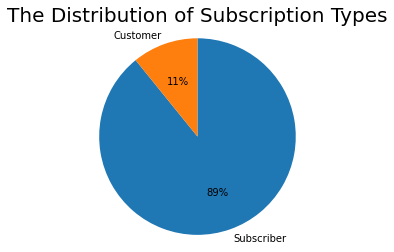

In [88]:
sorted_counts = bike['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("The Distribution of Subscription Types", fontsize=20)
plt.axis('square');

> The most of user are Subscriber.

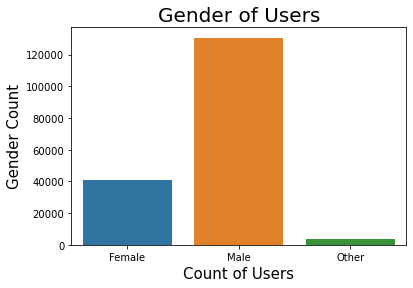

In [89]:
sb.countplot(data = bike, x = 'member_gender')
chart_name('Gender of Users','Count of Users','Gender Count')



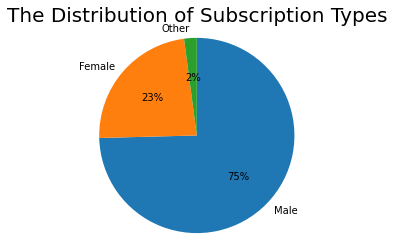

In [35]:
sorted_counts = bike['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("The Distribution of Subscription Types", fontsize=20)
plt.axis('square');

> It is expected ,that most of user are Male .

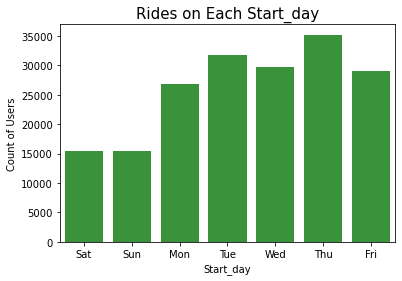

In [97]:
base_color = sb.color_palette()[2]
order = ['Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri']
sb.countplot(data = bike, x = 'start_day', order = order, color = base_color)

chart_name('Start_day','Count of Users','Rides on Each Start_day')

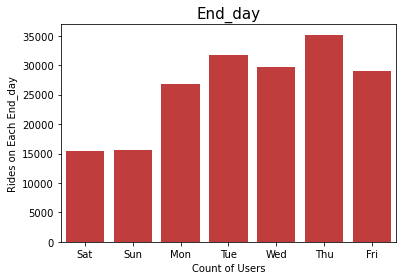

In [37]:
base_color = sb.color_palette()[3]
order = ['Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri']
sb.countplot(data = bike, x = 'end_day', order = order, color = base_color)

chart_name('End_day','Count of Users','Rides on Each End_day')

>- Yes, Saterday and Sunday are low of trips ,as they are weekend .

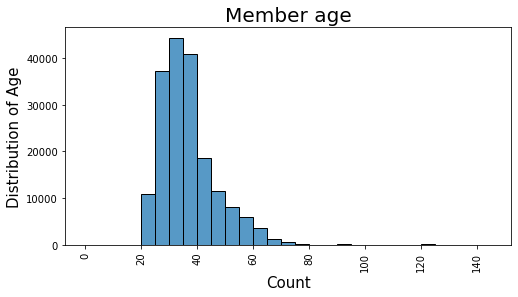

In [91]:
# Distribution of Age
base_color = sb.color_palette()[0]
plt.figure(figsize = (8,4))

bins = np.arange(0, bike['member_age'].max()+5, 5)
sb.histplot(data=bike, x='member_age', color=base_color, bins = bins)
plt.xticks(rotation=90)
chart_name('Member age','Count',"Distribution of Age")

In [43]:
bike.nlargest(10,'member_age')

,user_type,member_gender,member_age,start_day,end_day,duration_hour,duration_min,duration_sec,bike_share_for_all_trip
27370,Customer,Female,143.0,Mon,Mon,0.0,25.0,1474,No
1285,Subscriber,Male,121.0,Thu,Thu,0.0,2.0,148,Yes
10827,Subscriber,Male,121.0,Wed,Wed,0.0,22.0,1315,No
16087,Subscriber,Male,121.0,Wed,Wed,0.0,19.0,1131,No
19375,Customer,Male,121.0,Tue,Tue,0.0,11.0,641,No
21424,Subscriber,Male,121.0,Tue,Tue,0.0,24.0,1424,No
21506,Customer,Male,121.0,Tue,Tue,0.0,12.0,701,No
24042,Subscriber,Male,121.0,Mon,Mon,0.0,3.0,194,Yes
26133,Subscriber,Male,121.0,Mon,Mon,0.0,7.0,410,Yes
27675,Subscriber,Male,121.0,Mon,Mon,0.0,18.0,1087,No


>- The most User age is betwean 20 and 60
>- There are some outliers in age column

In [132]:
# Find ages above 80 
df_age_Out = bike[bike['member_age'] > 80]
df_age_Out

,user_type,member_gender,member_age,start_day,end_day,duration_hour,duration_min,duration_sec,bike_share_for_all_trip
1285,Subscriber,Male,121.0,Thu,Thu,0.0,2.0,148,Yes
5197,Subscriber,Male,90.0,Thu,Thu,0.0,4.0,217,No
5266,Subscriber,Male,90.0,Thu,Thu,0.0,6.0,384,No
5447,Subscriber,Male,90.0,Thu,Thu,0.0,2.0,147,No
10827,Subscriber,Male,121.0,Wed,Wed,0.0,22.0,1315,No
...,...,...,...,...,...,...,...,...,...
177885,Subscriber,Female,119.0,Fri,Fri,0.0,9.0,517,No
177955,Subscriber,Female,88.0,Fri,Fri,0.0,6.0,377,Yes
179280,Subscriber,Male,83.0,Fri,Fri,0.0,6.0,355,No
182830,Subscriber,Male,120.0,Fri,Fri,0.0,7.0,428,No


In [133]:
#drop the rows that age>80
bike = bike.drop(df_age_Out.index, axis=0)

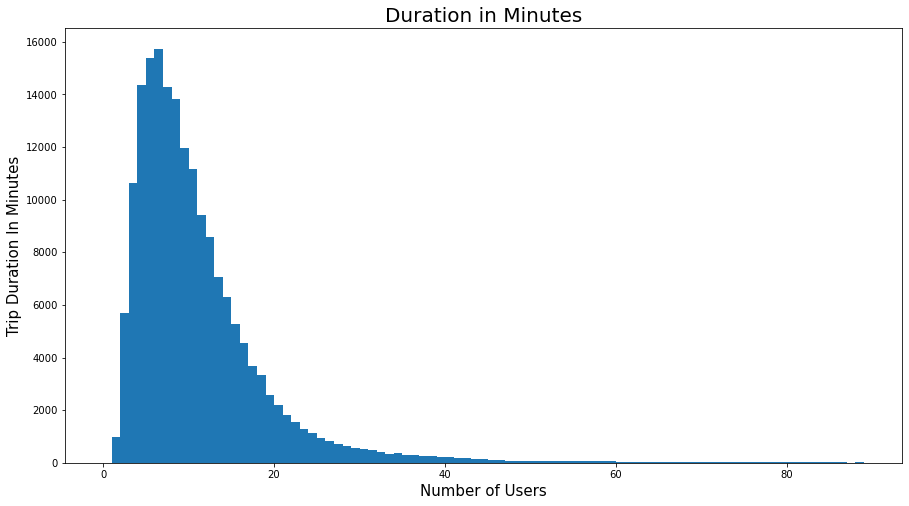

In [93]:
bin_edges = np.arange(0, 90)
plt.figure(figsize = (15,8))
plt.hist(data = bike, x = 'duration_min', bins = bin_edges)

chart_name('Duration in Minutes','Number of Users',"Trip Duration In Minutes")

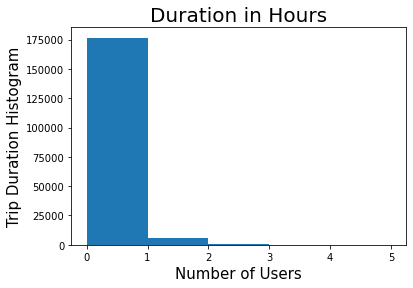

In [94]:
bin_edges = np.arange(0, 6)

plt.hist(data = bike, x = 'duration_hour', bins = bin_edges)


chart_name('Duration in Hours','Number of Users',"Trip Duration Histogram")

In [42]:
bike.duration_hour.describe()

count    183412.000000
mean          0.057210
std           0.516952
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: duration_hour, dtype: float64

In [157]:
bike.nlargest(10,'duration_hour')

,user_type,member_gender,member_age,start_day,end_day,duration_hour,duration_min,duration_sec,bike_share_for_all_trip
101361,Subscriber,NaN,36.193563,Wed,Thu,24.0,1424.0,85444,No
5203,Subscriber,Female,59.000000,Wed,Thu,23.0,1387.0,83195,Yes
8631,Subscriber,Female,58.000000,Wed,Thu,23.0,1359.0,81549,No
85465,Subscriber,Male,40.000000,Sat,Sun,23.0,1409.0,84548,No
95750,Customer,Other,23.000000,Thu,Fri,23.0,1375.0,82512,No
112435,Customer,Male,33.000000,Mon,Tue,23.0,1390.0,83407,No
127999,Customer,Male,31.000000,Sat,Sun,23.0,1392.0,83519,No
153705,Customer,NaN,36.193563,Tue,Wed,23.0,1396.0,83772,No
173365,Customer,NaN,36.193563,Sat,Sun,23.0,1373.0,82385,No
107581,Customer,Female,26.000000,Tue,Wed,22.0,1326.0,79548,No


>- The mean duration of the trip is about 30 minutes.
>- It seem that all tips start and end in the same day.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>- It is a good impact ,that the majority of user are Subscriber.
>- The most User age is betwean 20 and 80. the Age above 80 are outliers.
>- The number of males are much more than that of female and other.
>- The mean duration of the trip is about 30 minutes.
>- It seem that all tips start and end in the same day.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>- I choose the age betwean 20 and 80, as the age that greater than 80 can't ride bike.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [153]:
bike.columns

Index(['user_type', 'member_gender', 'member_age', 'start_day', 'end_day',
       'duration_hour', 'duration_mun', 'duration_sec',
       'bike_share_for_all_trip'],
      dtype='object')

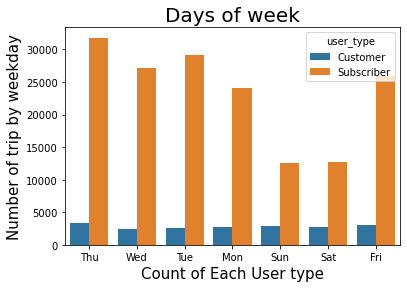

In [95]:
sb.countplot(data=bike,x='start_day',hue='user_type')


chart_name('Days of week' ,'Count of Each User type' ,'Number of trip by weekday')

>- As the Subscriber is the majurty, they uses bikes more than Customer weekdays.

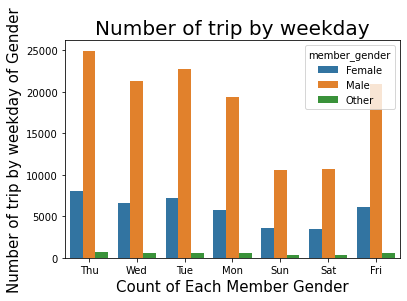

In [97]:
sb.countplot(data=bike,x='start_day',hue='member_gender')


chart_name('Number of trip by weekday' ,'Count of Each Member Gender' , 'Number of trip by weekday of Gender')

>- Over the weakdays the male have the majurty of rides bike.

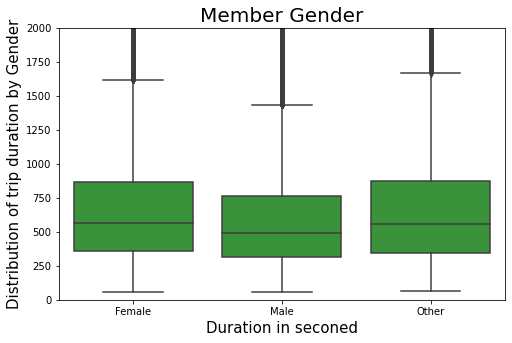

In [98]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[2]
sb.boxplot(data = bike, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([ 0,2000])

chart_name('Member Gender', 'Duration in seconed' ,"Distribution of trip duration by Gender")

>- The other ride for long time than male and female

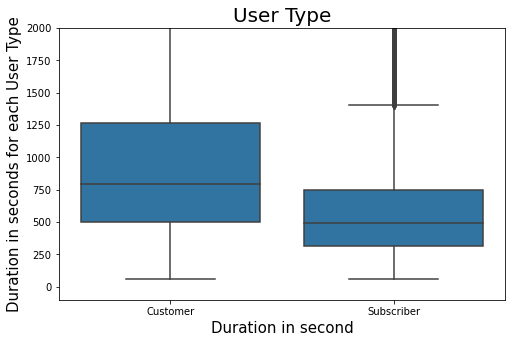

In [99]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = bike, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-100, 2000])

plt.title("Duration in seconds for each User Type", fontsize=14)
chart_name('User Type','Duration in second',"Duration in seconds for each User Type")

>- The Customer ride for long time thanSubscriber.

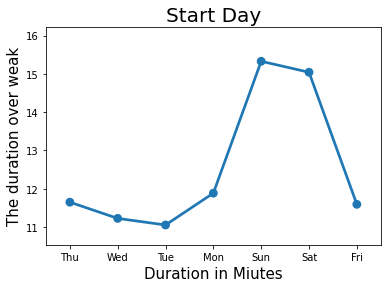

In [100]:
# plot the point plot of Start day
sb.pointplot(data=bike, x='start_day', y='duration_min', errwidth=0)

chart_name('Start Day' , 'Duration in Miutes' , 'The duration over weak')

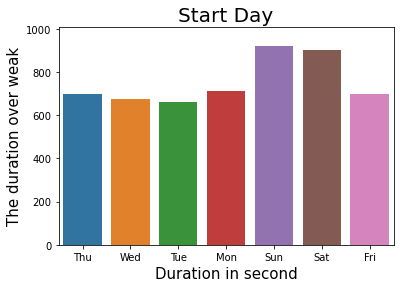

In [101]:
# plot the bar plot of Start day
sb.barplot(data=bike, x='start_day', y='duration_sec', errwidth=0)

chart_name('Start Day' , 'Duration in second' , 'The duration over weak')

>- the duration of the of trip icreases in weekend .

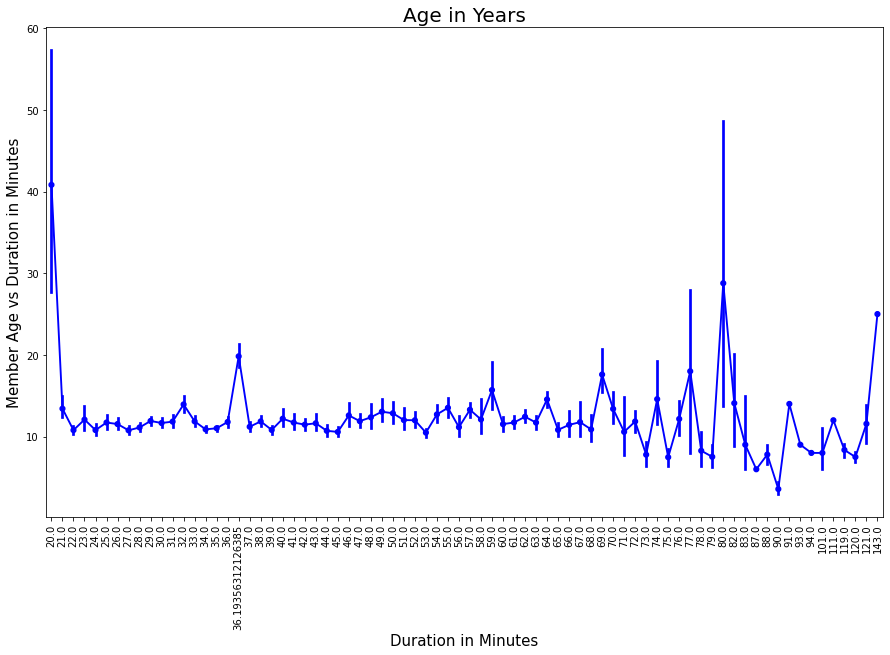

In [102]:
bins = np.arange(20, 85)
plt.figure(figsize=(15,9))
sb.pointplot(data = bike, x='member_age', y='duration_min', scale=.7, color='blue' , bin = bins)

plt.xticks(rotation = 90)
chart_name('Age in Years','Duration in Minutes' , 'Member Age vs Duration in Minutes')

>- The peaple in age 20 and 79 are ride for long time .

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>- The Subscribers ride bike more then Customer over the weak. 
>- The other ride for long time than male and female.
>- The Customer ride for long time than Subscriber.
>- the duration of the of trip icreases in weekend .
>-The peaple in age 20 and 79 are ride for long time .
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
>- Over the weakdays the male have the majurty of rides bik.



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

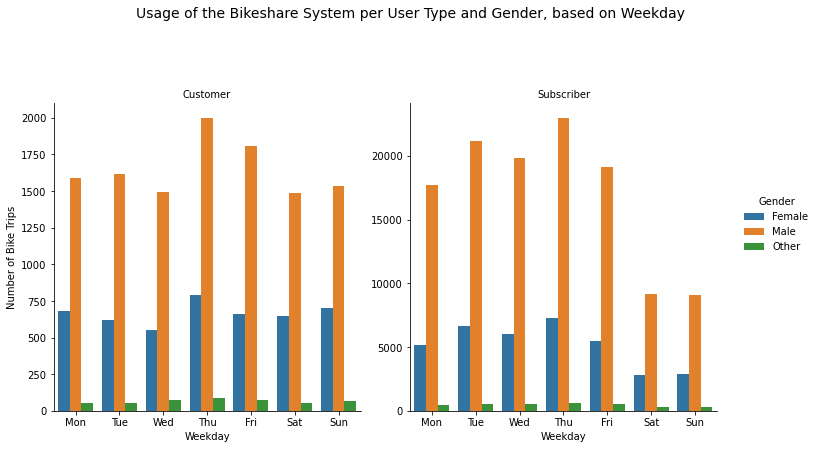

In [105]:
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=bike, x='start_day', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = day)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Usage of the Bikeshare System per User Type and Gender, based on Weekday', y=1.2, fontsize=14);

>- The Distribution of Gender betwean the Subscriber And customer look like each other .

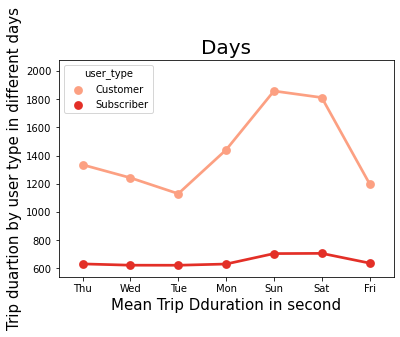

In [108]:
sb.pointplot(data = bike, x = 'start_day', y = 'duration_sec', hue = 'user_type', palette = 'Reds', errwidth=0)

chart_name('Days','Mean Trip Dduration in second','Trip duartion by user type in different days')

>- The Duration over Week show that customer ride more than Subscriber.

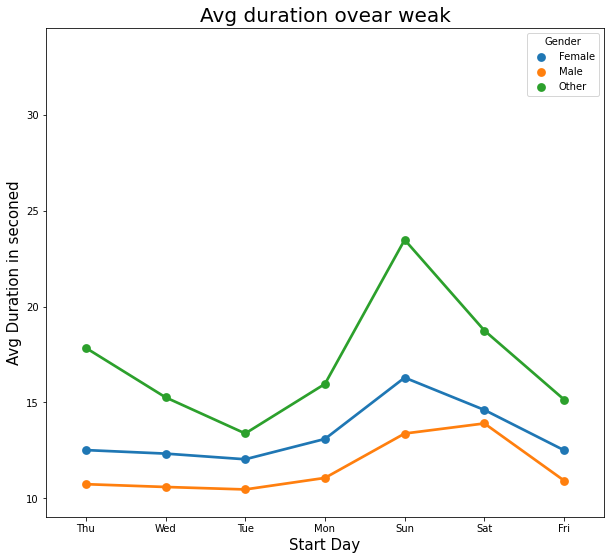

In [116]:
# plot the point plot of Duration vs gender

plt.figure(figsize=(10,9))
sb.pointplot(data=bike, x='start_day', y='duration_min', hue='member_gender', errwidth=0)

plt.legend(title='Gender')
chart_name('Avg duration ovear weak'  ,'Start Day','Avg Duration in seconed')

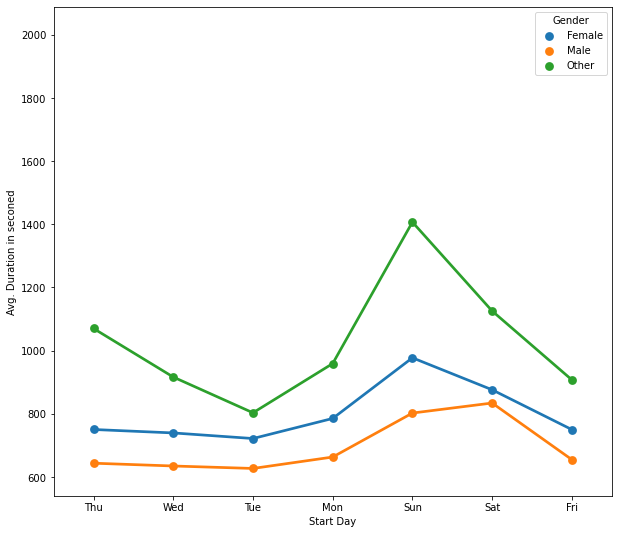

In [112]:
# plot the point plot of Duration vs gender

plt.figure(figsize=(10,9))
sb.pointplot(data=bike, x='start_day', y='duration_sec', hue='member_gender', errwidth=0)
plt.xlabel('Start Day')
plt.ylabel('Avg. Duration in seconed')
plt.legend(title='Gender');

>- It is stange for me that other and Females Ride loger time than male.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>- The Distribution of Gender betwean the Subscriber And customer look like each other .

### Were there any interesting or surprising interactions between features?

>- The Duration over Week show that customer ride more than Subscriber wherever, the precentage of Subscriber 89% of users. 
>- It is stange for me that other and Females Ride loger time than male.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [3]:
bike.to_csv('Bike.csv', index = False)

NameError: name 'bike' is not defined